# ML Test Tool Example Usage

This is a long form tutorial on how to use the functionality of `ml_test_tool_dev.py`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

We will load in the obvious dataset, iris. 

In [3]:
df['target']=data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


`MLTestTool` takes three arguements; training set, target, and params. Params is a dictionary of instances to be used. those params could be model, imputer, or scaler. 

In [4]:
params = {'model_instance':LogisticRegression(multi_class="auto",
                                              solver='lbfgs', 
                                             max_iter=3000)}
params_1 = {'model_instance':SVC(gamma="auto", probability=True)}

In [5]:
from ml_test_tools_dev import MLTestTool
test_ml = MLTestTool(training_df=df.drop("target", axis=1),
                     target=df.target)

We can run the method `test_model()` to run the CV routine and calculate metrics. 

In [6]:
test_ml.test_model(params=params)

{0: {'model_id': 0,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'mean': 0.95, 'sd': 0.0667},
  'specificity': {'mean': 0.9624, 'sd': 0.0473},
  'balanced_accuracy': {'mean': 0.9812, 'sd': 0.0237},
  'accuracy': {'mean': 0.9667, 'sd': 0.0298}}}

If you run it again, the new model will be saved by the class. This example is trivial, but if you were running random search for best parameters this will be very helpful. 

In [7]:
test_ml.test_model(params=params_1)

{0: {'model_id': 0,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'mean': 0.95, 'sd': 0.0667},
  'specificity': {'mean': 0.9624, 'sd': 0.0473},
  'balanced_accuracy': {'mean': 0.9812, 'sd': 0.0237},
  'accuracy': {'mean': 0.9667, 'sd': 0.0298}},
 1: {'model_id': 1,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision'

In [8]:
test_ml.rank_top_performers(metric='accuracy')

[{'model_id': 1,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'mean': 0.9444, 'sd': 0.0703},
  'specificity': {'mean': 0.9692, 'sd': 0.0377},
  'balanced_accuracy': {'mean': 0.9846, 'sd': 0.0188},
  'accuracy': {'mean': 0.9733, 'sd': 0.0249}},
 {'model_id': 0,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'

This provides a nice way to test several models and centralize the results. It is tremendously helpful when searching for hyperparameters via Grid or Random search. 

In [9]:
import random
import xgboost as xgb
N_TRIALS = 2
for i in range(N_TRIALS):
    learning_rate_factor = random.randint(1,25)
    xgb_rs = xgb.XGBClassifier(
        learning_rate=0.25 / learning_rate_factor,
        n_estimators=random.randint(20, 400),
        max_depth=random.randint(2, 10),
        min_child_weight=random.randint(1, 10),
        gamma=random.randint(0, 50)/5,
        subsample=1-(random.randint(1, 60)/100),
        colsample_bytree=1-(random.randint(1, 60)/100),
        random_state=9450,
        objective='multi:softprob'
        
    )
    test_ml.test_model({'model_instance':xgb_rs})

In [10]:
test_ml.rank_top_performers(metric='accuracy')

[{'model_id': 1,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'mean': 0.9444, 'sd': 0.0703},
  'specificity': {'mean': 0.9692, 'sd': 0.0377},
  'balanced_accuracy': {'mean': 0.9846, 'sd': 0.0188},
  'accuracy': {'mean': 0.9733, 'sd': 0.0249}},
 {'model_id': 0,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'

We can also plot the feature importances for models that retain feature weights. This is generally the case for tree boosted models such as GMB and XGB. 

In [11]:
xgb_best = test_ml.rank_top_performers(metric='accuracy')[2]['model']

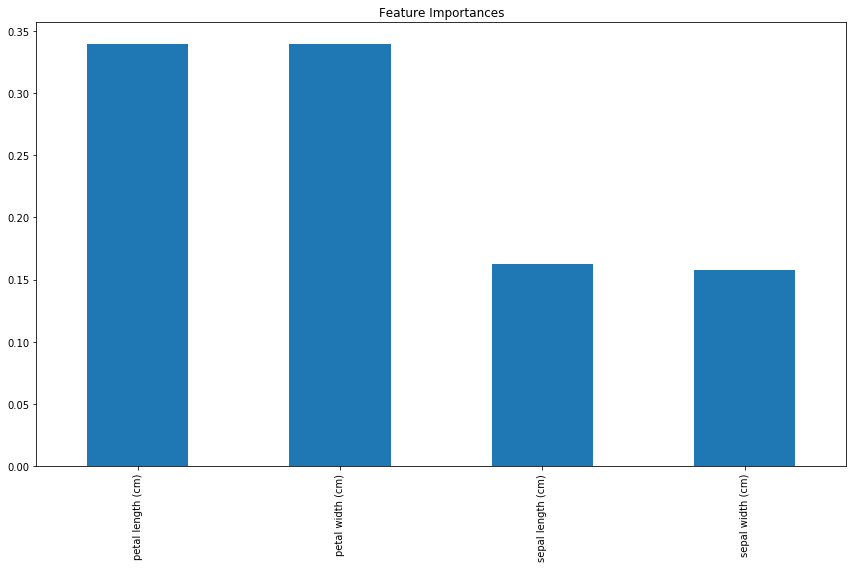

In [12]:
test_ml.plot_features_importance(xgb_best)

### ROC AUC Support

ROC AUC scores can be supported for binary classification. Use the argument `include_auc=True`

In [13]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data['target']

In [14]:
test_ml = MLTestTool(training_df=df.drop("target", axis=1),
                     target=df.target, 
                    include_auc=True)

In [15]:
test_ml.test_model(params=params_1)

{0: {'model_id': 0,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 0.8351, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'mean': 0.6276, 'sd': 0.0565},
  'specificity': {'mean': 0.0, 'sd': 0.0},
  'balanced_accuracy': {'mean': 0.5, 'sd': 0.0},
  'accuracy': {'mean': 0.6276, 'sd': 0.0565},
  'auc': {'mean': 0.9307, 'sd': 0.0129}}}

In [16]:
test_ml.test_model(params)

{0: {'model_id': 0,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 0.8351, 'sd': 0.0},
  'recall': {'mean': 1.0, 'sd': 0.0},
  'precision': {'mean': 0.6276, 'sd': 0.0565},
  'specificity': {'mean': 0.0, 'sd': 0.0},
  'balanced_accuracy': {'mean': 0.5, 'sd': 0.0},
  'accuracy': {'mean': 0.6276, 'sd': 0.0565},
  'auc': {'mean': 0.9307, 'sd': 0.0129}},
 1: {'model_id': 1,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 0.9686, 'sd': 0.0},
  'recall': {'

In [17]:
test_ml.rank_top_performers(metric='auc')

[{'model_id': 1,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 0.9686, 'sd': 0.0},
  'recall': {'mean': 0.9719, 'sd': 0.0193},
  'precision': {'mean': 0.955, 'sd': 0.0224},
  'specificity': {'mean': 0.927, 'sd': 0.0291},
  'balanced_accuracy': {'mean': 0.9495, 'sd': 0.0128},
  'accuracy': {'mean': 0.9543, 'sd': 0.0129},
  'auc': {'mean': 0.9922, 'sd': 0.0042}},
 {'model_id': 0,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 0.8351, 'sd': 0.0},
  'r